In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
import os


# Remove: import plotly.plotly as py
# Optional (cloud): import chart_studio.plotly as py


In [2]:
df=pd.read_csv("/content/BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(537577, 12)

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


1. Gender


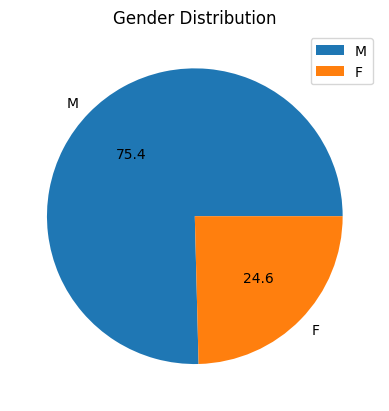

In [6]:
count=df['Gender'].value_counts()
plt.pie(count, labels=count.index, autopct="%1.1f")
plt.title("Gender Distribution")
plt.legend()
plt.show()

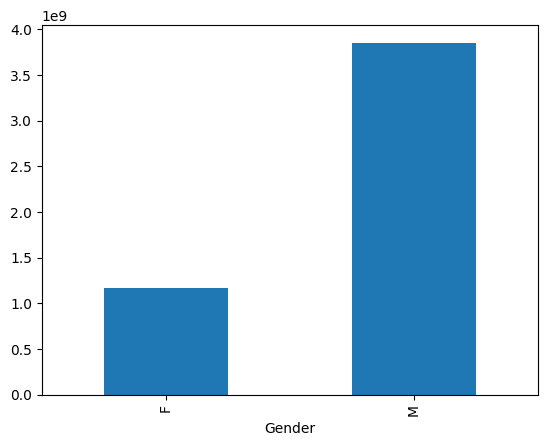

In [7]:
df.groupby('Gender')['Purchase'].sum().sort_values().plot(kind='bar')
plt.show()




Men's purchasing power is greater than women's purchasing power, even in normal circumstances. This is likely to affect the owner of the money, but there has been a high turnout of men in the store. About 75% of the customers have made sales of men of all ages, The men are generally heading toward products at 8000 - 12,000, we have probably made sales worth more than 4 billion in men and more than 1 billion in ladies


2. Age

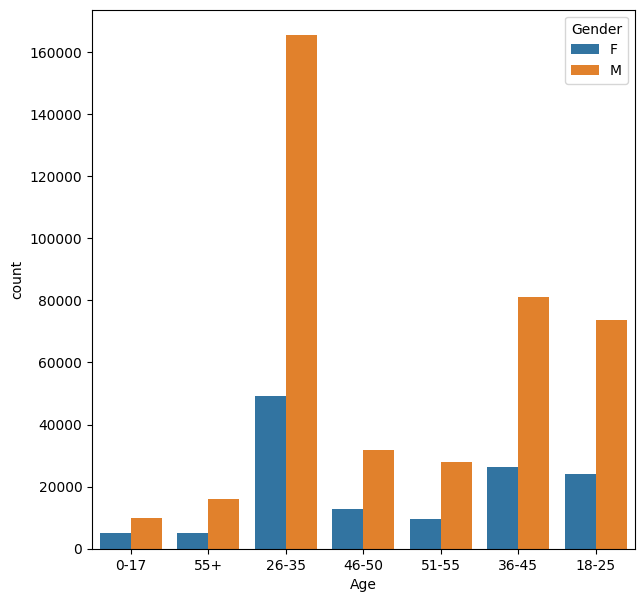

In [8]:
plt.figure(figsize=(7,7))
sns.countplot(x='Age', hue='Gender', data=df)
plt.show()


<Axes: xlabel='Age'>

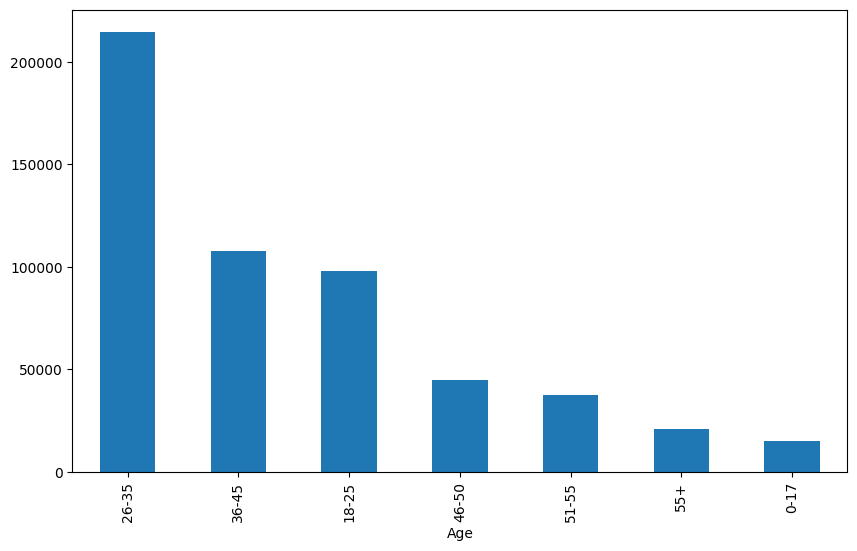

In [9]:
gender_age_count=df['Age'].value_counts()
gender_age_count.plot(kind='bar', figsize=(10,6))


Obviously, we can consider that the target age group of our stores is the age group of 26-35 years, we have achieved sales of more than 3 billion in the age group of 26-45 years

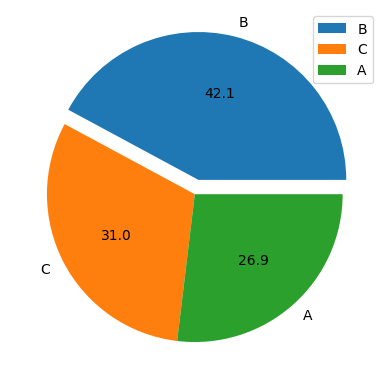

In [10]:
City_Category_Count=df['City_Category'].value_counts()
plt.pie(City_Category_Count, labels=City_Category_Count.index, autopct="%1.1f", explode = (0.1, 0, 0))
plt.legend()
plt.show()


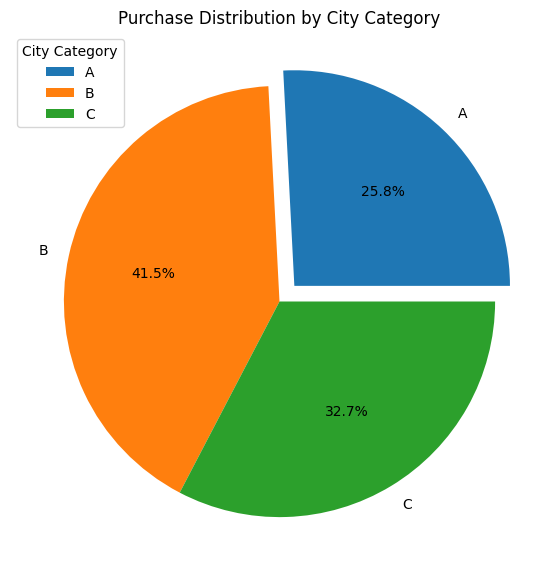

In [11]:
import matplotlib.pyplot as plt

# Group and sort
city_purchase = df.groupby('City_Category')['Purchase'].sum()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(city_purchase, labels=city_purchase.index, autopct='%1.1f%%', explode = (0.1, 0, 0))

plt.title("Purchase Distribution by City Category")
plt.legend(title="City Category")
plt.show()


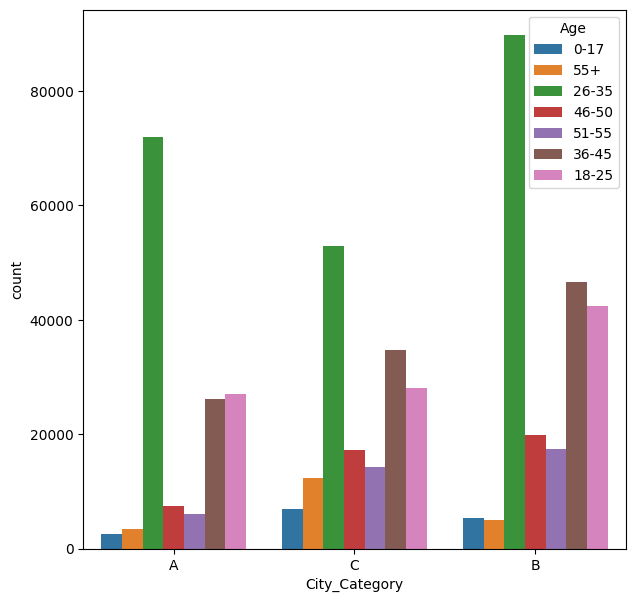

In [12]:
plt.figure(figsize=(7,7))
sns.countplot(x='City_Category', hue='Age', data=df)
plt.show()


Unexpectedly, the highest sales do not come in the number of purchases, people from Area B have a greater purchasing power than others, and greater sales gained from people from Area C

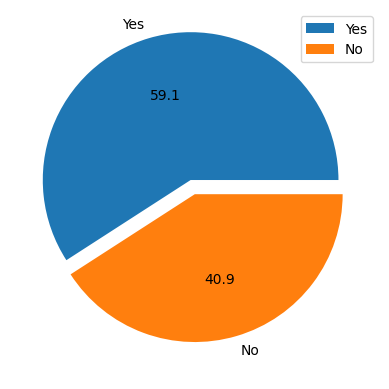

In [18]:
married_count=df['Marital_Status'].value_counts()
plt.pie(married_count, labels=['Yes','No'], autopct="%1.1f", explode = (0.1, 0))
plt.legend()
plt.show()


Most of our customers are more than 60% married, I see that the strategy of targeting families to ensure more clients succeed

**4-Stability**


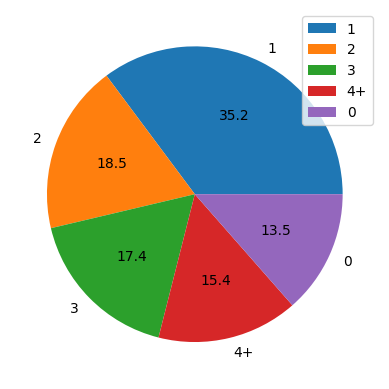

In [29]:
stay_in_current_city_count=df['Stay_In_Current_City_Years'].value_counts()
plt.pie(stay_in_current_city_count, labels=stay_in_current_city_count.index, autopct="%1.1f")
plt.legend()
plt.show()


/tmp/ipython-input-3402031390.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




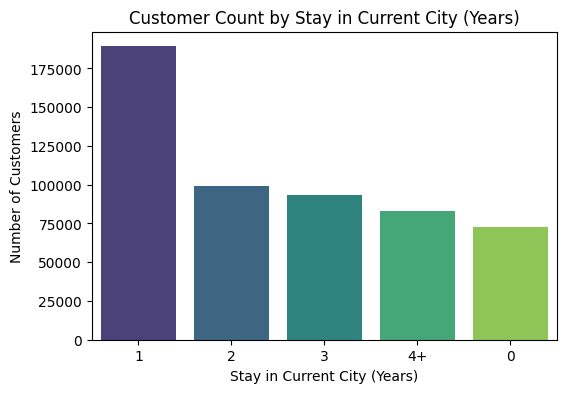

In [26]:
# Count of shoppers by Stay in Current City
plt.figure(figsize=(6,4))
sns.countplot(x="Stay_In_Current_City_Years", data=df, palette="viridis", order=df["Stay_In_Current_City_Years"].value_counts().index)
plt.title("Customer Count by Stay in Current City (Years)")
plt.xlabel("Stay in Current City (Years)")
plt.ylabel("Number of Customers")
plt.show()

5-Occupation

/tmp/ipython-input-3953567730.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




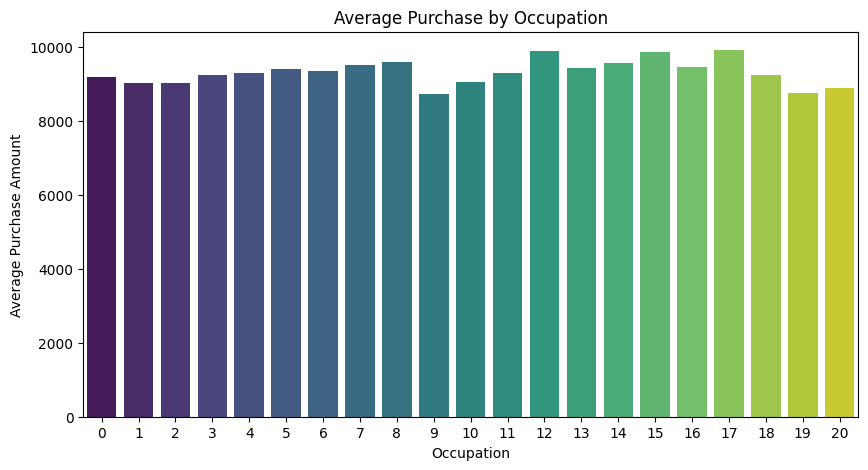

In [23]:
# 1. Average purchase by Occupation
occ_avg = df.groupby("Occupation")["Purchase"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="Occupation", y="Purchase", data=occ_avg, palette="viridis")
plt.title("Average Purchase by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Purchase Amount")
plt.show()

6-Products and Catiegories

/tmp/ipython-input-980121447.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




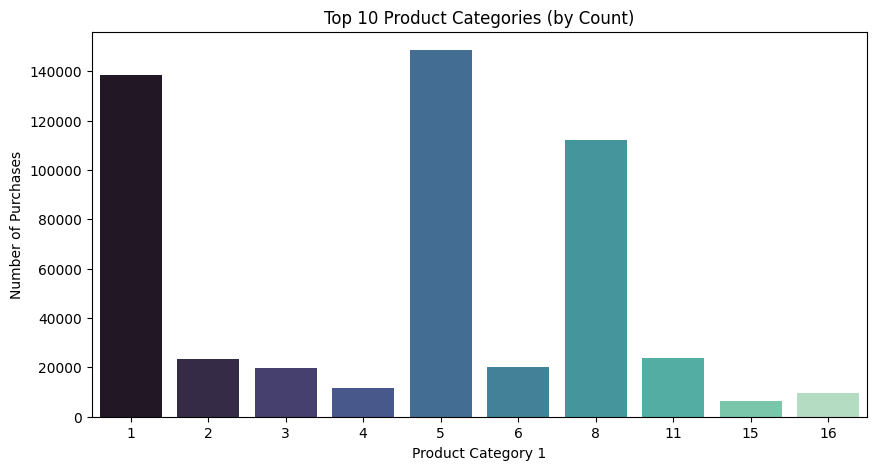

In [28]:
# Top 10 Product_Category_1 by count
cat1_counts = df["Product_Category_1"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=cat1_counts.index, y=cat1_counts.values, palette="mako")
plt.title("Top 10 Product Categories (by Count)")
plt.xlabel("Product Category 1")
plt.ylabel("Number of Purchases")
plt.show()

**Key Insights**
1. Customer Demographics

Gender:

Males dominate the shopper base.

Men also spend more per purchase compared to women.

Age Groups:

The 26–35 age group is the largest customer segment and has the highest spending.

Followed by 36–45 years.

Younger group (0–17) spends the least.

City Category:

Majority of shoppers are from City B, followed by City C and City A.

This suggests mid-tier cities are the biggest contributors.

**2. Product Categories**

Certain categories like Product_Category_5, 1, and 8 are the most frequently purchased.

High-value categories (electronics, appliances) drive higher average purchase amounts, while clothing and accessories are lower per-purchase.

***3. Spending Behavior***

A small percentage of customers (top spenders) contribute a large share of total sales.

Indicates potential for loyalty programs or personalized offers to retain these high-value customers.

**Business Strategies**

**Target Marketing**

Focus on male shoppers aged 26–35, especially in City B.

Use personalized campaigns for these high-spending groups.

Product Promotions **bold text**

Highlight electronics & appliances during big sale events (since they drive higher spend).

Push clothing & accessories with bundle offers (since they are frequent but lower-spend).

**Customer Retention**

Introduce loyalty programs for repeat buyers.

Identify top 10% of spenders and give them exclusive benefits.

**City-wise Strategy**

Strengthen City B campaigns (biggest base).

Expand promotions in City C to increase per-user spending.